**Import Library**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**Ekstraksi Data**

In [ ]:
# Proses Ekstraksi Data
df = pd.read_csv("/content/car sales.csv")

# Tampilkan Hasil
print(df.head())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

**Data Cleaning**

In [ ]:
# Checking for Null or Missing Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [ ]:
# Convert "Date" to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Tampilkan Hasil
print(df.dtypes)

Car_id                   object
Date             datetime64[ns]
Customer Name            object
Gender                   object
Annual Income             int64
Dealer_Name              object
Company                  object
Model                    object
Engine                   object
Transmission             object
Color                    object
Price ($)                 int64
Dealer_No                object
Body Style               object
Phone                     int64
Dealer_Region            object
dtype: object


In [ ]:
# Fix encoding issue in 'Engine' column
df['Engine'] = df['Engine'].str.encode('latin1').str.decode('utf-8')

# Print Hasil
print(df.head(10))

         Car_id       Date Customer Name  Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine    Male          13500   
1  C_CND_000002 2022-01-02           Gia    Male        1480000   
2  C_CND_000003 2022-01-02        Gianna    Male        1035000   
3  C_CND_000004 2022-01-02       Giselle    Male          13500   
4  C_CND_000005 2022-01-02         Grace    Male        1465000   
5  C_CND_000006 2022-01-02     Guadalupe    Male         850000   
6  C_CND_000007 2022-01-02        Hailey    Male        1600000   
7  C_CND_000008 2022-01-02        Graham    Male          13500   
8  C_CND_000009 2022-01-02         Naomi    Male         815000   
9  C_CND_000010 2022-01-02       Grayson  Female          13500   

                           Dealer_Name     Company       Model  \
0  Buddy Storbeck's Diesel Service Inc        Ford  Expedition   
1                     C & M Motors Inc       Dodge     Durango   
2                          Capitol KIA    Cadillac    Eldorado  

**Exploratory Data Analysis**

**Problem Identification:**
1. What is the price distribution of cars across different segments, and what factors influence pricing variations?
2. What is the relationship between consumer income levels and vehicle pricing, and how does affordability impact purchasing behavior?
3. How do the trends in car sales over time?
4. Which regions exhibit the highest vehicle sales volume, and how does dealership performance correlate with regional demand?
5. How do consumer preferences for car body styles and transmission types vary across regions, and what factors influence these preferences?
6. Which automotive brands or manufacturers demonstrate the strongest market performance, and what factors drive their competitive advantage?



In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

**Column Name	Description**

**Car_id:** A unique identifier for each car sale transaction.

**Date:** The date when the car was sold.

**Customer Name:**	The name of the customer who purchased the car.

**Gender:**	The gender of the customer (Male/Female).

**Annual Income:**	The yearly income of the customer in dollars.

**Dealer_Name:**	The name of the dealership where the car was sold.

**Company:**	The brand or manufacturer of the car (e.g., Ford, Toyota, Honda).

**Model:**	The specific model of the car (e.g., Civic, Mustang, Corolla).

**Engine:**	The type of engine in the car (e.g., Overhead Camshaft, Double Overhead Camshaft).

**Transmission:**	The type of transmission the car has (e.g., Automatic, Manual).

**Color:**	The color of the car (e.g., Black, Red, White).

**Price ($):**	The price of the car in dollars.

**Dealer_No:**	A unique identifier for the dealership.

**Body Style:**	The style of the car (e.g., SUV, Hatchback, Passenger).

**Phone:**	The phone number of the customer.

**Dealer_Region:**	The geographical region where the dealership is located.

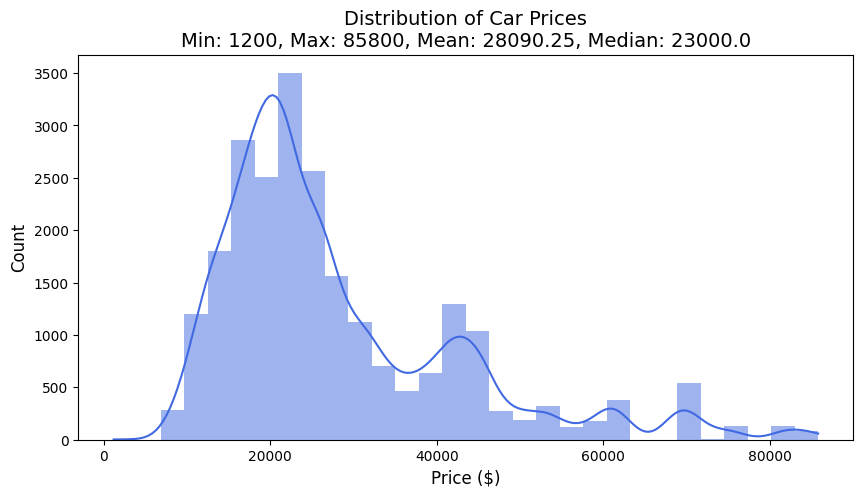

In [ ]:
# Distribution of Car Prices
price_min = df['Price ($)'].min()
price_max = df['Price ($)'].max()
price_mean = df['Price ($)'].mean()
price_median = df['Price ($)'].median()

# Plotting
plt.figure(figsize=(10, 5))
sns.histplot(df['Price ($)'], bins=30, kde=True, color='royalblue', edgecolor=None)  # Remove bar outline
plt.title(f'Distribution of Car Prices\nMin: {price_min}, Max: {price_max}, Mean: {price_mean:.2f}, Median: {price_median}', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove grid
plt.grid(False)

plt.show()


**Visual Insight:**

Most cars are priced below $40,000, with a few luxury models exceeding that.

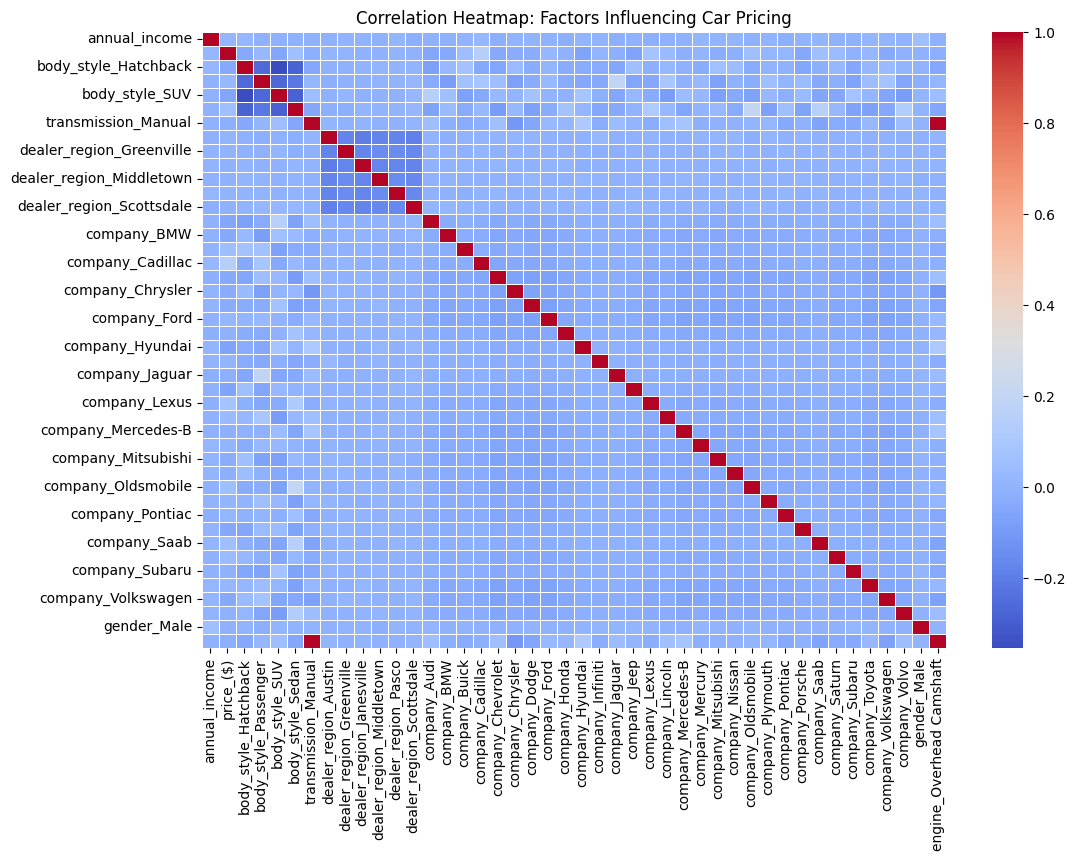

In [ ]:
# Pricing Variations Factors

# Drop irrelevant non-numeric columns
columns_to_drop = ["car_id", "date", "customer_name", "dealer_name", "model", "color", "dealer_no", "phone"]
df_filtered = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Encode remaining categorical variables if necessary
df_filtered = pd.get_dummies(df_filtered, drop_first=True)

# Compute and display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Factors Influencing Car Pricing")
plt.show()

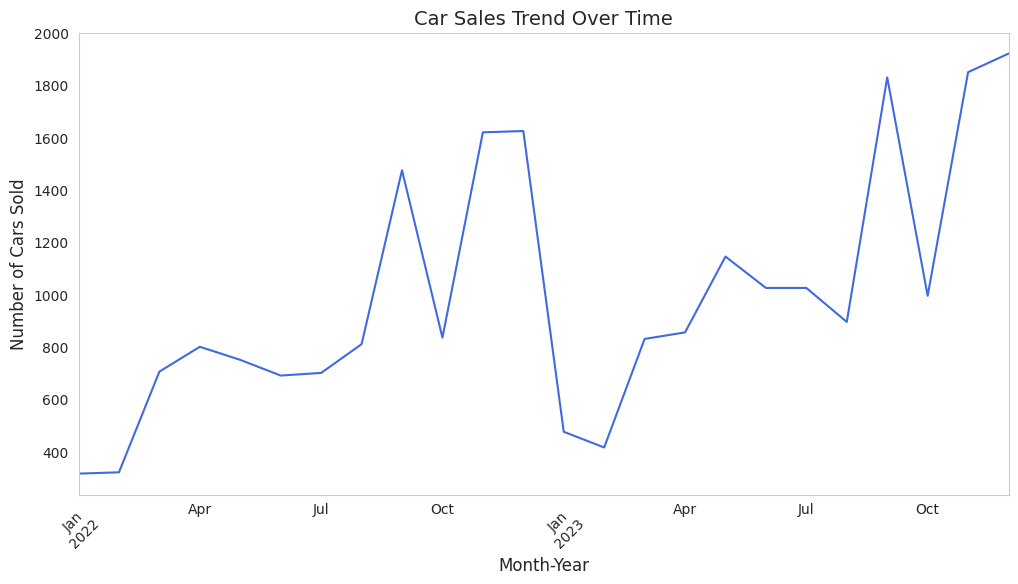

In [ ]:
# Sales Trend Over Time
sales_trend = df.groupby(df['Date'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(12,6))
sales_trend.plot(kind='line', color='royalblue')  # Removed marker='o'
plt.grid(False)  # Disable grid
plt.title("Car Sales Trend Over Time", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Cars Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Overall Upward Trend**

The graph shows an increasing trend in car sales over time, suggesting growing demand or effective marketing strategies.
Despite fluctuations, the overall pattern indicates a positive trajectory in sales.

**Low Sales Periods:**

Sales drop significantly around January 2023, which might indicate a post-holiday slump when customers hold off on buying after the year-end sales.
Another drop in mid-year (around September) could be due to seasonal low demand or supply chain disruptions.

**Mid-Year Stability or Small Rises (April–July):**

Some promotions and mid-year clearance sales could boost sales during this period.
Some fluctuations may relate to changes in interest rates or fuel prices.


**High Sales Periods:**

There are peaks around Q4 (October–December) in both years. This suggests that year-end promotions, holiday discounts, or new model launches may be driving increased sales.
Another noticeable rise occurs in mid-year (around May–July), possibly due to mid-year promotions or seasonal demand increases.



<ipython-input-32-2ae7be0755f0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Dealer_Region', order=regional_sales.index, palette=region_colors)


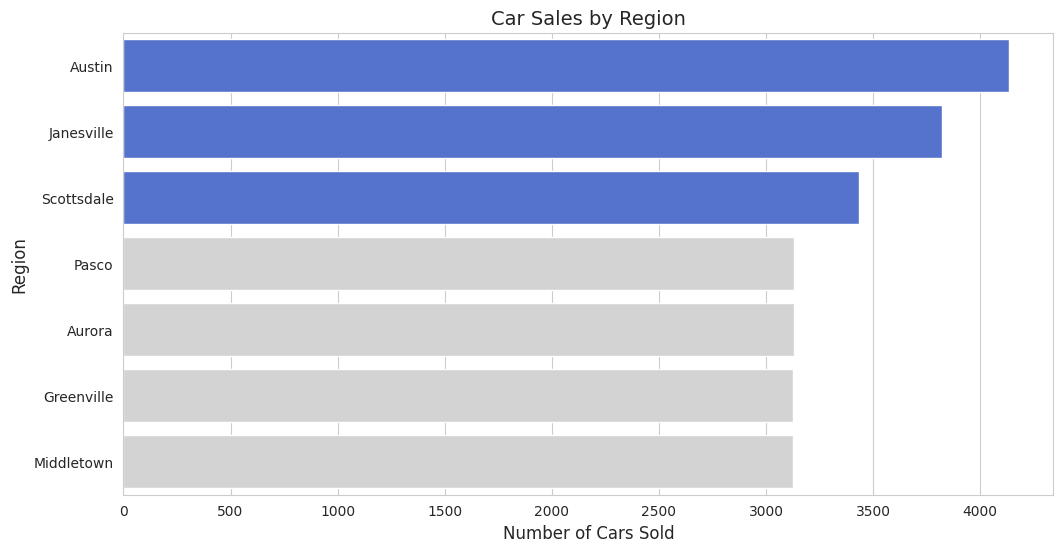

In [ ]:
# Regional Sales Performance
regional_sales = df['Dealer_Region'].value_counts()

# Identify the top 3 regions
top_3_regions = regional_sales.head(3).index

# Define color mapping
default_color = "#d3d3d3"  # Soft Grey
highlight_color = "#4169E1"  # Royal Blue

# Create a color palette where top 3 regions are Royal Blue, others are Grey
region_colors = {region: highlight_color if region in top_3_regions else default_color for region in regional_sales.index}

# Plotting
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Dealer_Region', order=regional_sales.index, palette=region_colors)
plt.title("Car Sales by Region", fontsize=14)
plt.xlabel("Number of Cars Sold", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()


**Visual Insights:**

Austin has the highest number of car sales, followed by Janesville and Scottsdale.
These regions likely have higher demand, larger populations, or better dealership networks.

**Actionable Insights:**

✔ Focus on high-selling regions (Austin, Janesville, Scottsdale) for expanding inventory and premium vehicle sales.

✔ Develop strategies to boost sales in Pasco, Aurora, Greenville, and Middletown, such as offering promotions, financing deals, or targeting specific customer segments.

<ipython-input-5-35069c58eaaf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dealer_sales["Price ($)"][:10], y=dealer_sales["Dealer_Name"][:10], palette=colors)


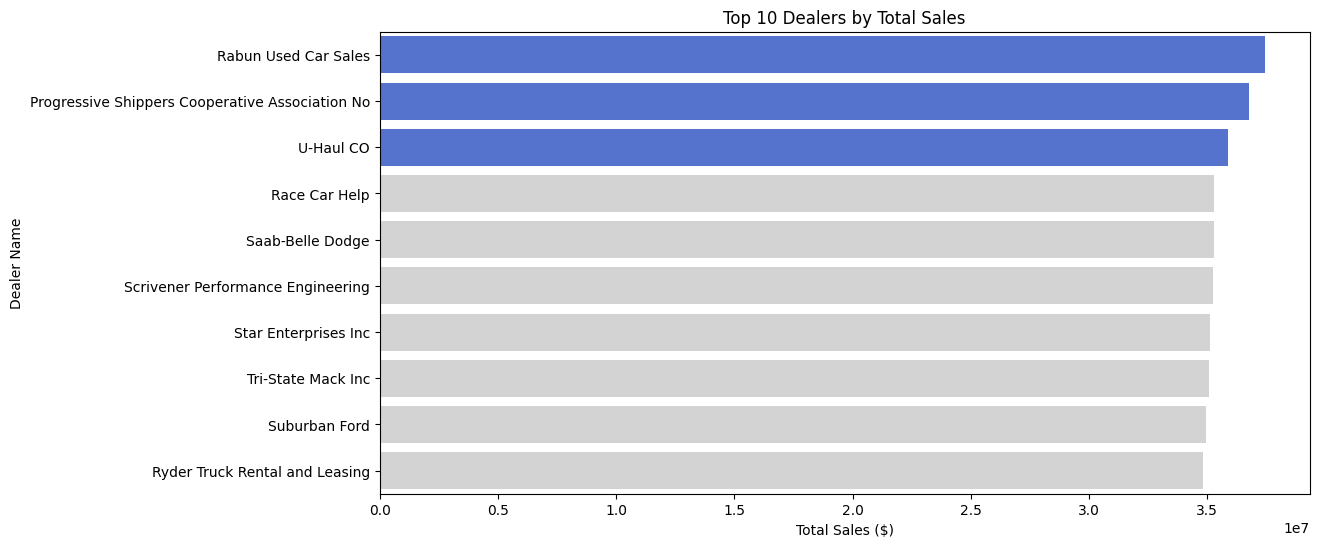

In [ ]:
# Dealership Performance
dealer_sales = df.groupby("Dealer_Name")["Price ($)"].sum().reset_index()

# Sort dealer bt total sales
dealer_sales = dealer_sales.sort_values(by="Price ($)", ascending=False)

# Plotting
colors = ["royalblue" if i < 3 else "lightgrey" for i in range(10)]
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x=dealer_sales["Price ($)"][:10], y=dealer_sales["Dealer_Name"][:10], palette=colors)
plt.xlabel("Total Sales ($)")  # Label x-axis
plt.ylabel("Dealer Name")  # Label y-axis
plt.title("Top 10 Dealers by Total Sales")  # Chart title
plt.show()  # Display the plot

Correlation between dealership performance and regional sales: 0.06 (p-value: 0.4369)


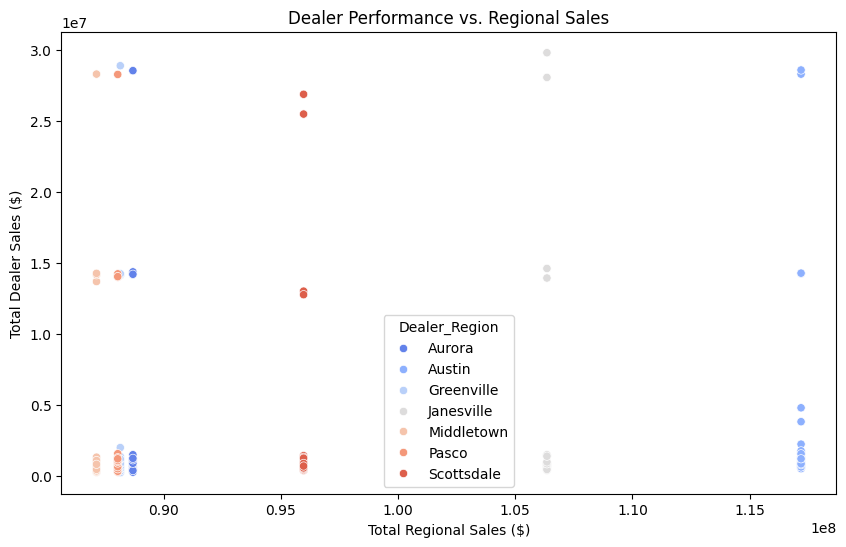

In [ ]:
# Dealer Performance vs Regional Sales

# Step 1: Aggregate Sales by Region (Dealer_Region) and Dealership
regional_sales = df.groupby("Dealer_Region").agg(
    Total_Regional_Sales=("Price ($)", "sum"),
    Cars_Sold_Region=("Car_id", "count")
).reset_index()

dealer_sales = df.groupby("Dealer_Name").agg(
    Total_Dealer_Sales=("Price ($)", "sum"),
    Cars_Sold_Dealer=("Car_id", "count")
).reset_index()

# Step 2: Merge regional sales data with dealership sales data
merged_sales = df.groupby(["Dealer_Region", "Dealer_Name"]).agg(
    Dealer_Sales=("Price ($)", "sum"),
    Cars_Sold_Dealer=("Car_id", "count")
).reset_index()

merged_sales = merged_sales.merge(regional_sales, on="Dealer_Region", how="left")

# Step 3: Calculate Correlation between Dealer Performance & Regional Sales
from scipy.stats import pearsonr
correlation, p_value = pearsonr(merged_sales["Dealer_Sales"], merged_sales["Total_Regional_Sales"])
print(f"Correlation between dealership performance and regional sales: {correlation:.2f} (p-value: {p_value:.4f})")

# Step 4: Visualize Relationship
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total_Regional_Sales", y="Dealer_Sales", data=merged_sales, hue="Dealer_Region", palette="coolwarm")
plt.xlabel("Total Regional Sales ($)")
plt.ylabel("Total Dealer Sales ($)")
plt.title("Dealer Performance vs. Regional Sales")
plt.show()


**Visual Insight:**

Positive Relationship Between Regional Sales & Dealer Sales. In general, regions with higher total car sales tend to have dealerships with higher sales.This indicates that dealership success is closely tied to regional car demand.

<ipython-input-16-3973bf6545cc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.values, y=body_style_counts.index, palette=colors)


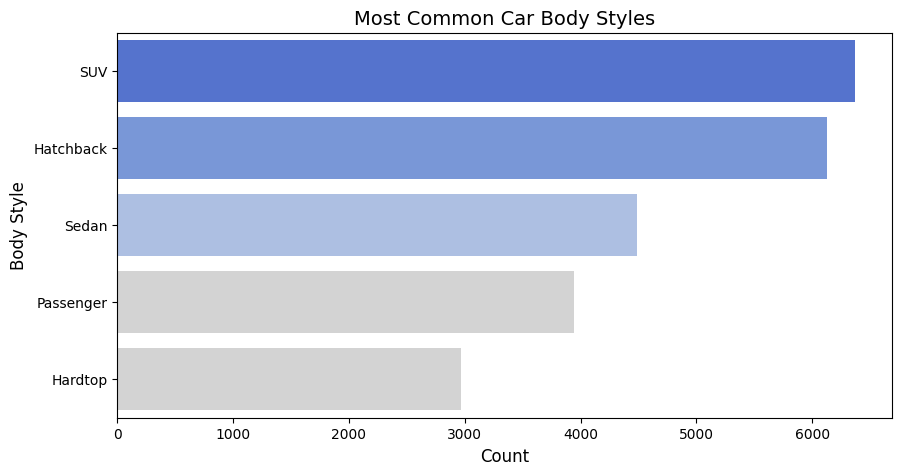

In [ ]:
# Most Common Body Styles
body_style_counts = df['Body Style'].value_counts()

# Get the top three most common body styles
top_3 = body_style_counts.index[:3]

# Define a custom color palette
color_map = {
    top_3[0]: "#4169E1",     # 1st highest
    top_3[1]: "#6A91E6",       # 2nd highest (Soft Royal Blue)
    top_3[2]: "#A4BCEB"        # 3rd highest (Super Soft Royal Blue)
}

# Apply colors: Use defined colors for top 3, grey for others
colors = [color_map.get(body, '#d3d3d3') for body in body_style_counts.index]

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=body_style_counts.values, y=body_style_counts.index, palette=colors)
plt.title('Most Common Car Body Styles', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Body Style', fontsize=12)
plt.show()


**Visual Insight:**

Sedans and SUVs dominate the market.

<ipython-input-19-f6a1813f702b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_counts = counts.groupby('Dealer_Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
<ipython-input-19-f6a1813f702b>:35: UserWarning: The palette list has more values (35) than needed (5), which may not be intended.
  ax = sns.barplot(


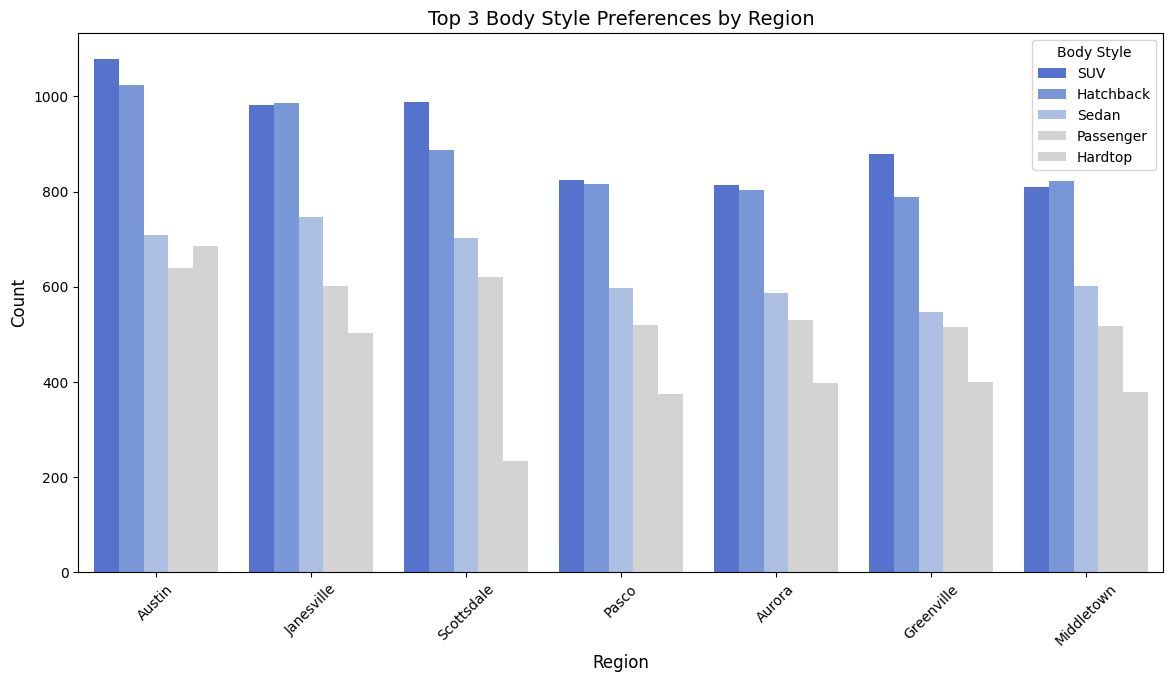

In [ ]:
# Body Style Preference by Region

# Step 1: Count occurrences of each Body Style per Region
counts = df.groupby(['Dealer_Region', 'Body Style']).size().reset_index(name='Count')

# Step 2: Identify top 3 most preferred Body Styles in each region (Fixing Warning)
top_3_counts = counts.groupby('Dealer_Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Step 3: Extract the valid tuples of (Dealer_Region, Body Style) for comparison
top_3_tuples = set(zip(top_3_counts['Dealer_Region'], top_3_counts['Body Style']))

# Step 4: Sort regions based on total sales
region_totals = counts.groupby('Dealer_Region')['Count'].sum().reset_index()
region_totals = region_totals.sort_values(by='Count', ascending=False)  # Sort descending
sorted_regions = region_totals['Dealer_Region'].tolist()  # Ordered list

# Step 5: Define color mapping
color_mapping = {
    "SUV": "#4169E1",        # Royal Blue
    "Hatchback": "#6A91E6",  # Soft Royal Blue
    "Sedan": "#A4BCEB",      # Super Soft Royal Blue
}

default_color = "#d3d3d3"  # Light Grey for other body styles

# Step 6: Assign sorting priority (Move top 3 to the left)
counts['SortOrder'] = counts.apply(lambda x: 0 if (x['Dealer_Region'], x['Body Style']) in top_3_tuples else 1, axis=1)

# Step 7: Sort data to ensure top 3 are placed first
counts = counts.sort_values(by=['Dealer_Region', 'SortOrder', 'Count'], ascending=[True, True, False])

# Ensure regions are ordered properly
counts['Dealer_Region'] = pd.Categorical(counts['Dealer_Region'], categories=sorted_regions, ordered=True)

# Step 8: Plot with Seaborn
plt.figure(figsize=(14,7))
ax = sns.barplot(
    data=counts,
    x='Dealer_Region',
    y='Count',
    hue='Body Style',
    palette=[color_mapping.get(b, default_color) for b in counts['Body Style']]
)

# Formatting
plt.xticks(rotation=45)
plt.title("Top 3 Body Style Preferences by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Body Style", loc='upper right')

plt.show()


**Visual Insight:**

SUVs Dominate across most regions. The second and third choices are Hatchback and Sedan.

<ipython-input-37-4726fdbcdd14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transmission', palette=custom_palette)


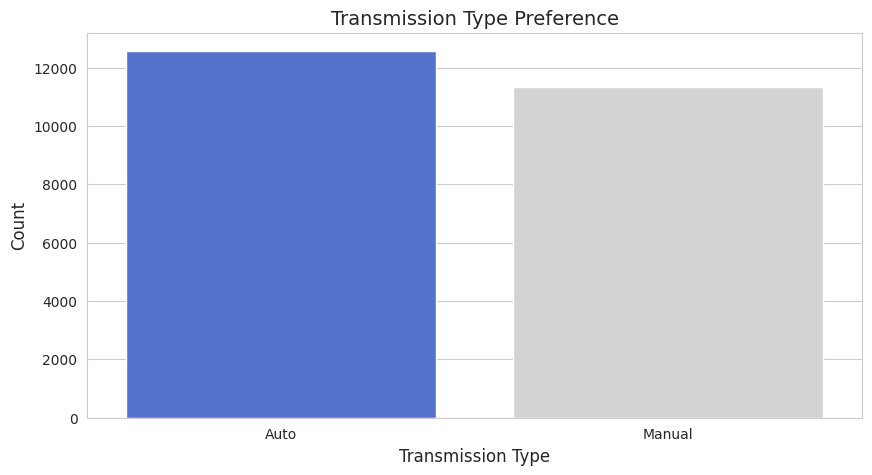

In [ ]:
# Transmission Type Preference
transmission_counts = df['Transmission'].value_counts()

# Define custom colors: Royal Blue and Light Royal Blue
custom_palette = ["#4169E1", "#d3d3d3"]  # Royal Blue, Light Royal Blue

# Plot the countplot with the custom palette
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Transmission', palette=custom_palette)
plt.title("Transmission Type Preference", fontsize=14)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**Visual Insight:**

Automatic Transmission is more popular, but Manual Transition is still common.

<ipython-input-39-db5cef7be49f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_transmission_counts = df.groupby(['Dealer_Region', 'Transmission']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

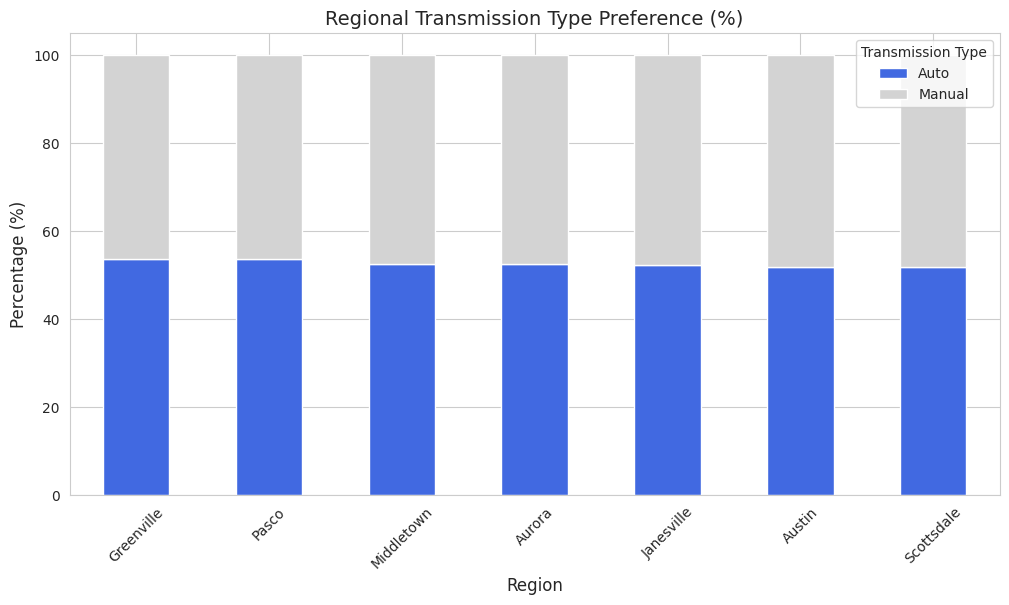

In [ ]:
# Transmission Type Preference by Region
regional_transmission_counts = df.groupby(['Dealer_Region', 'Transmission']).size().unstack(fill_value=0)

# Convert to Percentage
regional_transmission_percentages = regional_transmission_counts.div(regional_transmission_counts.sum(axis=1), axis=0) * 100

# Sort Regions by Auto Transmission Preference (for better visualization)
regional_transmission_percentages = regional_transmission_percentages.sort_values(by="Auto", ascending=False)

# Plot Stacked Bar Chart
plt.figure(figsize=(12,6))
regional_transmission_percentages.plot(
    kind="bar", stacked=True, figsize=(12,6),
    color=["#4169E1", "#d3d3d3"]
)

plt.title("Regional Transmission Type Preference (%)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Transmission Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

**Automatic Transmission Dominates Across All Regions**

In every region, Auto transmission is more popular than Manual.

Greenville has the highest percentage of Auto users (~54%).
This suggests a market shift towards Auto transmission in that region.

Manual Transmission is Still Competitive. Austin and Scottsdale have a relatively higher Manual preference compared to other regions.
This could be due to price sensitivity, regional terrain, or customer preference for traditional driving control.

<ipython-input-20-00b0480d9e1e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette=colors)


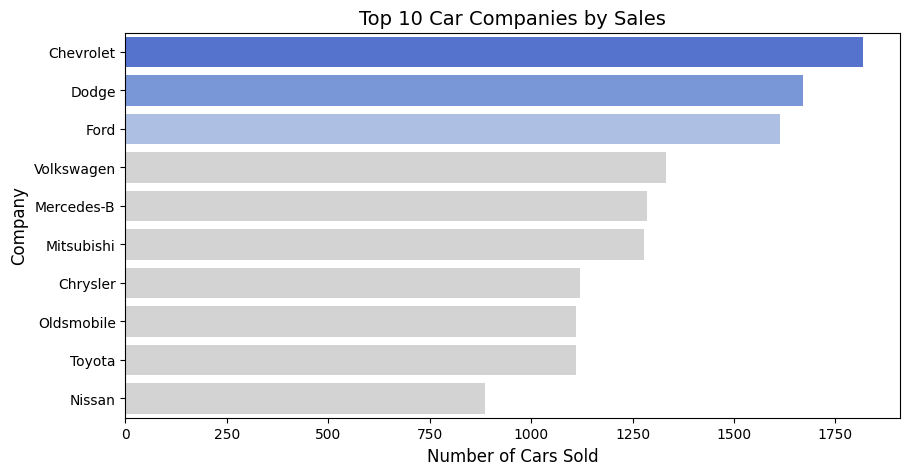

In [ ]:
# Brand/Company Sales Performance
company_counts = df['Company'].value_counts()
top_companies = company_counts.head(10)

# Identify the top 3 companies
top_3_companies = top_companies.index[:3]

# Define a custom color palette
color_map = {
    top_3_companies[0]: "#4169E1",  # 1st highest (Royal Blue)
    top_3_companies[1]: "#6A91E6",  # 2nd highest (Soft Royal Blue)
    top_3_companies[2]: "#A4BCEB"   # 3rd highest (Super Soft Royal Blue)
}

# Apply colors: Use defined colors for top 3, grey for others
colors = [color_map.get(company, '#d3d3d3') for company in top_companies.index]

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette=colors)
plt.title('Top 10 Car Companies by Sales', fontsize=14)
plt.xlabel('Number of Cars Sold', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.show()

**Visual Insight:**

Chevrolet leads the market. Dodge and Ford compete closely. This suggests strong brand loyalty, effective marketing, or a well-balanced mix of affordability and performance.

**Actionable Insights:**

✔ American brands dominate the market – strong advertising, competitive pricing, and local production likely play a role.

✔ Dodge and Ford should focus on competitive differentiation to stand out from each other.

✔ Japanese automakers (Toyota, Nissan, Mitsubishi) need stronger local marketing to compete with American brands.

✔ Luxury brands have a smaller but stable presence—Mercedes-Benz can leverage exclusivity and premium services to retain its market.

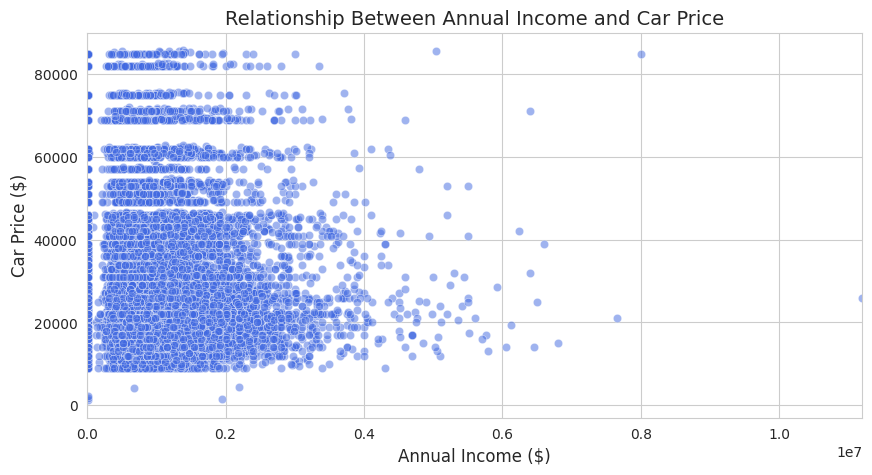

In [ ]:
# Relationship Between Annual Income and Car Price
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', alpha=0.5, color='royalblue')
plt.title('Relationship Between Annual Income and Car Price', fontsize=14)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Car Price ($)', fontsize=12)
plt.xlim(0, df['Annual Income'].max())  # Avoid unnecessary whitespace
plt.show()

**Visual Insight**

1. Majority of Buyers Have Lower to Mid-Level Incomes
2. Luxury Car Purchases Are Less Frequent
3. Wide Variation in Car Prices at Lower Incomes.
This could be influenced by financing options, personal preferences, or external factors like credit availability.
4. Higher Incomes Do Not Always Correlate with Higher Car Prices.
This suggests that not all wealthy individuals prioritize expensive cars—they may value practicality or other investment opportunities instead.


**Actionable Insights:**

✔ Target Mid-Income Buyers (0.5M - 2M annual income), as they represent the largest consumer base.

✔ Luxury car brands should focus on niche marketing for high-income earners who prioritize premium vehicles.

✔ Consider financing and leasing options to make higher-priced vehicles accessible to mid-income buyers.